In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
dataset=pd.read_csv("Ads_CTR_Optimisation.csv")
print(dataset)

      Ad 1  Ad 2  Ad 3  Ad 4  Ad 5  Ad 6  Ad 7  Ad 8  Ad 9  Ad 10
0        1     0     0     0     1     0     0     0     1      0
1        0     0     0     0     0     0     0     0     1      0
2        0     0     0     0     0     0     0     0     0      0
3        0     1     0     0     0     0     0     1     0      0
4        0     0     0     0     0     0     0     0     0      0
...    ...   ...   ...   ...   ...   ...   ...   ...   ...    ...
9995     0     0     1     0     0     0     0     1     0      0
9996     0     0     0     0     0     0     0     0     0      0
9997     0     0     0     0     0     0     0     0     0      0
9998     1     0     0     0     0     0     0     1     0      0
9999     0     1     0     0     0     0     0     0     0      0

[10000 rows x 10 columns]


In [32]:
import math
N=10000;
d=10;   # no of ads to display
ads_selected=[]
number_of_selections=[0]*d
sum_of_rewards=[0]*d
total_reward=0
for n in range(0,N):
  ad=0;
  max_upper_bound=0;
  for i in range(0, d):
    if(number_of_selections[i]>0):
      average_reward=sum_of_rewards[i]/number_of_selections[i];
      delta_i=math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
      upper_bound=average_reward+delta_i;
    else:
      upper_bound=1e400
    if(upper_bound>max_upper_bound):
      max_upper_bound=upper_bound;
      ad=i
  ads_selected.append(ad)
  number_of_selections[ad]=number_of_selections[ad]+1
  reward=dataset.values[n,ad]
  sum_of_rewards[ad]=sum_of_rewards[ad]+reward
  total_reward=total_reward+reward

<function matplotlib.pyplot.show(close=None, block=None)>

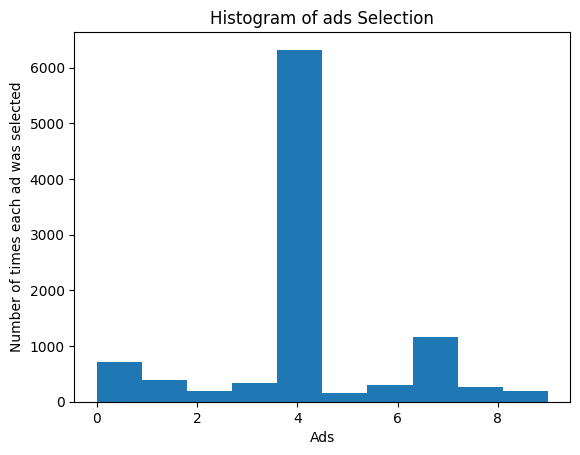

In [33]:
plt.hist(ads_selected)
plt.title('Histogram of ads Selection')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show